In [31]:
import json
import csv
from PIL import Image, ImageDraw
from torchvision import transforms

In [6]:
f = open("/data/datasets/fr_shopping.json")
f2 = open("/data/datasets/openimages/train-annotations-bbox.csv")

In [7]:
reader = csv.reader(f2)

In [18]:
for i in reader:
    print(i)
    break

['000002b66c9c498e', 'xclick', '/m/01g317', '1', '0.012500', '0.195312', '0.148438', '0.587500', '0', '1', '0', '0', '0']


In [9]:
i = Image.open("/data/datasets/openimages/images/train/000002b66c9c498e.jpg")

In [11]:
i.width

1024

In [16]:
draw = ImageDraw.Draw(i)
x0 = 355.2
x1 = 395.200512
y0 = 241.600512
y1 = 1024.0
draw.line((x0,y0, x0, y1), fill=128)
draw.line((x0,y1, x1, y1), fill=128)
draw.line((x1,y0, x1, y1), fill=128)
draw.line((x1,y0, x0, y0), fill=128)

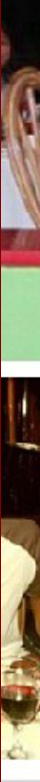

In [17]:
i.crop( (x0,y0,x1,y1) )

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [32]:
normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
prepro = transforms.Compose([
        transforms.RandomResizedCrop(256),

        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])

In [57]:
from dataset import openimages

In [58]:
d = openimages.OpenImages(image_dir="/data/datasets/openimages/images/train/", 
                          bbox_file="/data/datasets/openimages/train-annotations-bbox.csv", 
                         classes="/data/datasets/openimages/class-descriptions-boxable.csv", 
                          transform=prepro)

In [61]:
d[50][1].shape

000004f4400f6ec5


(300,)

In [23]:
class WordEncoder:
    def __init__(self, dictFile, vecFile):
        self.model = fastText.load_model(vecFile)

    def get_sentence_vector(self, sentence):
        return self.model.get_sentence_vector(sentence)
        

In [25]:
we = WordEncoder("/data/datasets/openimages/train-annotations-bbox.csv", "/data/m.portaz/wiki.en.bin")

In [26]:
we.get_sentence_vector("blabla bubu")

array([-5.26979491e-02,  5.06421812e-02,  6.02511223e-03, -3.87725383e-02,
       -3.14235911e-02,  3.36937644e-02, -1.84677076e-02, -8.23290646e-03,
        6.45060092e-02,  2.80435290e-02,  4.45827842e-02, -9.40761529e-03,
        1.82005037e-02, -5.95381223e-02,  3.92384268e-02, -7.96118230e-02,
        1.64610092e-02,  4.23002578e-02,  9.91358235e-03,  6.82687685e-02,
        8.01854115e-03,  5.34698628e-02, -3.90340909e-02,  1.79033075e-02,
       -1.68850590e-02, -3.62770446e-03,  6.58822209e-02, -5.43204509e-02,
       -1.25820097e-02,  1.22765386e-02, -4.26877961e-02,  7.34755695e-02,
        3.74646112e-02, -6.18881825e-03, -2.15696152e-02,  1.39084589e-02,
       -8.57956521e-03,  2.48457734e-02, -5.26189283e-02,  4.41349763e-03,
       -1.39792189e-02,  4.45534140e-02,  5.13113886e-02, -3.22986171e-02,
       -3.72802056e-02,  9.42091048e-02,  4.25098687e-02, -3.78246680e-02,
       -3.89800295e-02,  2.90251672e-02,  3.52765284e-02, -7.28492886e-02,
       -8.75748247e-02,  

In [11]:
import fastText

In [12]:
m = fastText.load_model('/data/m.portaz/wiki.en.bin')

In [14]:
m.get_sentence_vector('hello sir').shape

(300,)